Classificador Naive Bayes

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [76]:
carros=pd.read_csv('carros_categorical.csv')
display(carros)

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,BMW,1 Series M,2011,7,335.0,6.0,3,3,2.0,3,0,5,26,19,3916,46135,4
1,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,68,0,4,28,19,3916,40650,4
2,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,65,0,5,28,20,3916,36350,4
3,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,68,0,5,28,18,3916,29450,4
4,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,64,0,4,28,18,3916,34500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,46120,0
11780,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,56670,0
11781,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50620,0
11782,Acura,ZDX,2013,5,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50920,0


In [77]:
X=carros.loc[:,'ano' : 'preco_venda'].to_numpy()
y=carros['label'].to_numpy()
X_treino, X_teste, y_treino, y_teste=train_test_split(X,y,test_size=0.20,stratify=y,
                                                     random_state=123,shuffle=True)

In [78]:
carros['fabricante'] = carros['fabricante'].astype('category')
num_categorias = len(carros['fabricante'].cat.categories)
print('Tamanho do conjunto de treinamento: {}'.format(len(X_treino)))
print('Tamanho do conjunto de testes: {}'.format(len(X_teste)))
print('Quantidade total de classes ou categorias: {}'.format(num_categorias))


Tamanho do conjunto de treinamento: 9427
Tamanho do conjunto de testes: 2357
Quantidade total de classes ou categorias: 38


In [79]:
carros['fabricante'].describe()

count         11784
unique           38
top       Chevrolet
freq           1123
Name: fabricante, dtype: object

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_treino,y_treino)
y_predicao=gnb.predict(X_teste)
print('Total de classificações erradas de um total de {} instâncias : {}'
      .format(X_teste.shape[0],(y_teste !=y_predicao).sum()))

Total de classificações erradas de um total de 2357 instâncias : 11


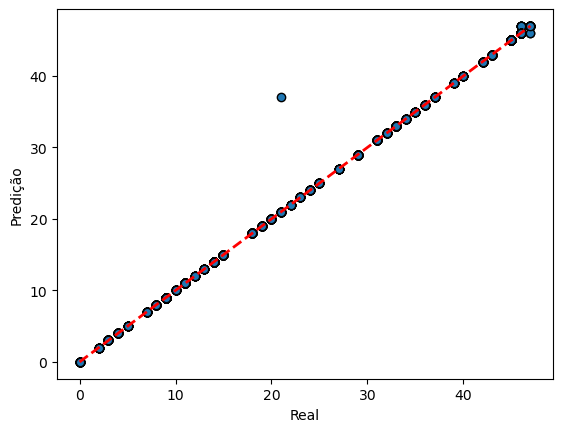

In [81]:
# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

In [82]:
from sklearn.metrics import classification_report
code_cats= carros['fabricante'].cat.categories
relatorio=classification_report(y_teste,y_predicao,target_names=code_cats)
print(relatorio)

               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00        50
 Aston Martin       1.00      1.00      1.00        19
         Audi       1.00      1.00      1.00        66
          BMW       1.00      1.00      1.00        67
      Bentley       1.00      1.00      1.00        15
        Buick       1.00      1.00      1.00        39
     Cadillac       1.00      1.00      1.00        79
    Chevrolet       1.00      1.00      1.00       225
     Chrysler       1.00      1.00      1.00        37
        Dodge       1.00      1.00      1.00       125
         FIAT       1.00      1.00      1.00        12
      Ferrari       1.00      1.00      1.00        14
         Ford       1.00      1.00      1.00       176
          GMC       1.00      1.00      1.00       103
        Honda       1.00      1.00      1.00        90
      Hyundai       1.00      1.00      1.00        61
     Infiniti       1.00      1.00      1.00        66
         

Considerendo o Desbalanceamento de Fabricantes

In [83]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

# Metodo isotonico
isotonic = CalibratedClassifierCV(gnb, cv=4, method='isotonic')

# Metodo sigmoid
sigmoid = CalibratedClassifierCV(gnb, cv=4, method='sigmoid')

isotonic.fit(X_treino, y_treino)
sigmoid.fit(X_treino, y_treino)

CalibratedClassifierCV(cv=4, estimator=GaussianNB())

Total de classificações erradas de um total de 2357 instâncias : 11
	Precisão: 0.995
	Recall: 0.997
	F1: 0.996



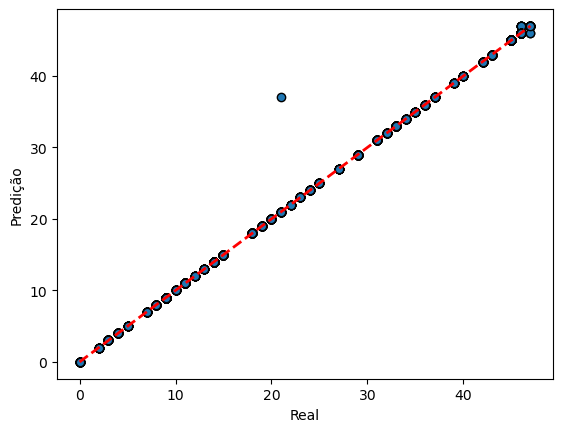

Total de classificações erradas de um total de 2357 instâncias : 9
	Precisão: 0.996
	Recall: 0.998
	F1: 0.997



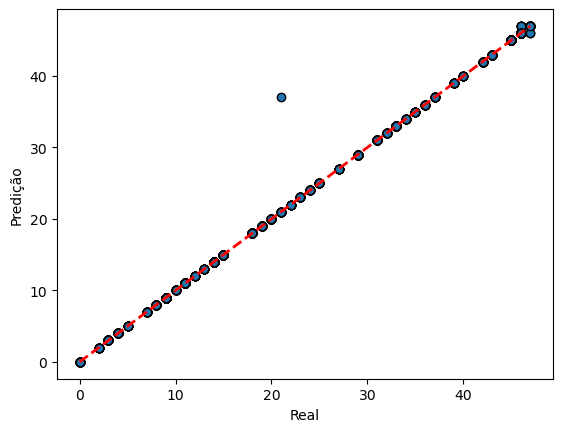

Total de classificações erradas de um total de 2357 instâncias : 10
	Precisão: 0.996
	Recall: 0.997
	F1: 0.996



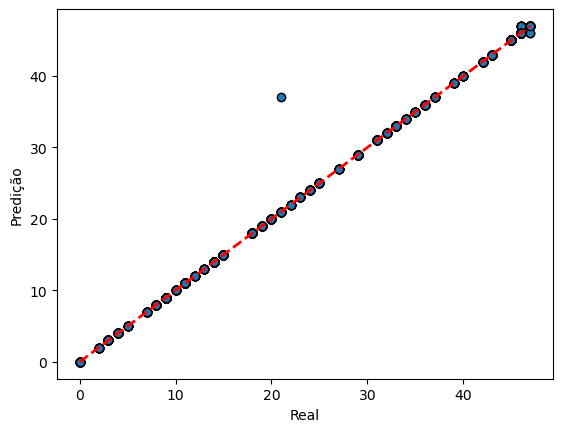

In [84]:
predicoes = [ p.predict(X_teste) for p in [gnb, isotonic, sigmoid] ]

for y_predicao in predicoes:
    print("Total de classificações erradas de um total de {} instâncias : {}".format( 
      X_teste.shape[0], (y_teste != y_predicao).sum()))
    print("\tPrecisão: %1.3f" % precision_score(y_teste, y_predicao, average='macro')) 
    print("\tRecall: %1.3f" % recall_score(y_teste, y_predicao, average='macro')) 
    print("\tF1: %1.3f\n" % f1_score(y_teste, y_predicao, average='macro'))
    
    resultados = classification_report(y_teste, y_predicao, target_names=code_cats)
    # Plota o grafico de resultados
    fig, ax = plt.subplots()
    ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))    
    ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
    ax.set_xlabel('Real')
    ax.set_ylabel('Predição')
    plt.show()

Regressão Linear

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
import numpy as np

In [86]:
VAR1, VAR2 = ('popularidade', 'preco_venda')

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")

df_2variaveis = carros.loc[:, [VAR1,VAR2] ]

df_2variaveis = df_2variaveis.drop_duplicates(subset=VAR2, keep="last")

df_2variaveis = df_2variaveis.drop_duplicates(subset=VAR1, keep="last")

df_2variaveis

,popularidade,preco_venda
590,819,23890
882,376,2117
7328,1715,98300
7837,190,61350
7907,436,21135
8206,258,93450
8364,1158,1500000
8726,2202,37995
8920,454,68405
9308,26,28465


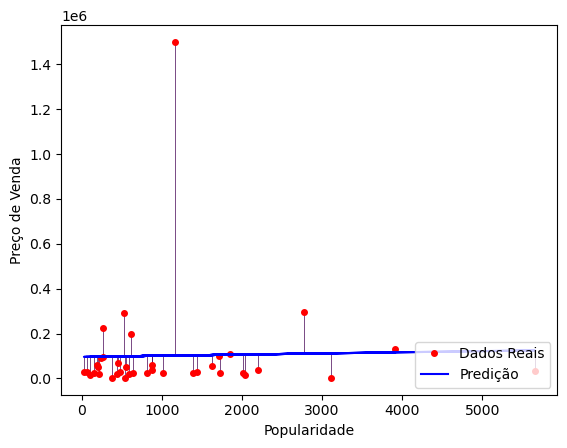

In [87]:
x = df_2variaveis[VAR1].to_numpy()
y = df_2variaveis[VAR2].to_numpy()
n = len(df_2variaveis[VAR1])
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  
y_ = lr.predict(x[:, np.newaxis])

segments = [[[x[i], y[i]], [x[i], y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))


fig = plt.figure()
plt.plot(x, y, 'r.', markersize=8)
plt.plot(x, y_, 'b-')
plt.gca().add_collection(lc)
plt.legend(('Dados Reais', 'Predição'), loc='lower right')
plt.xlabel('Popularidade')
plt.ylabel('Preço de Venda')
plt.title('')
plt.show()

In [88]:
#Regra de Negócio
pop_media = carros['popularidade'].mean()
carros['popular'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)
carros

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label,popular
0,BMW,1 Series M,2011,7,335.0,6.0,3,3,2.0,3,0,5,26,19,3916,46135,4,1
1,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,68,0,4,28,19,3916,40650,4,1
2,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,65,0,5,28,20,3916,36350,4,1
3,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,68,0,5,28,18,3916,29450,4,1
4,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,64,0,4,28,18,3916,34500,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,46120,0,0
11780,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,56670,0,0
11781,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50620,0,0
11782,Acura,ZDX,2013,5,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50920,0,0


Classificação de Automóveis em Poular e Não-Popular

In [89]:
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.special import expit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)

y = carros['label'].to_numpy()

carros = carros.drop(columns=['fabricante','modelo','popularidade'])

X = carros.iloc[:, :-1].to_numpy()
y = carros.iloc[:, -1].to_numpy()


# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

In [91]:
# Classificacao Regressao Logistica

clf_logistica = linear_model.LogisticRegression(C=1e5)

clf_logistica.fit(X_treino, y_treino)

y_pred_logistica = clf_logistica.predict(X_teste)


              precision    recall  f1-score   support

 não popular       0.62      0.97      0.76      4521
     popular       0.53      0.05      0.09      2857

    accuracy                           0.61      7378
   macro avg       0.57      0.51      0.42      7378
weighted avg       0.58      0.61      0.50      7378



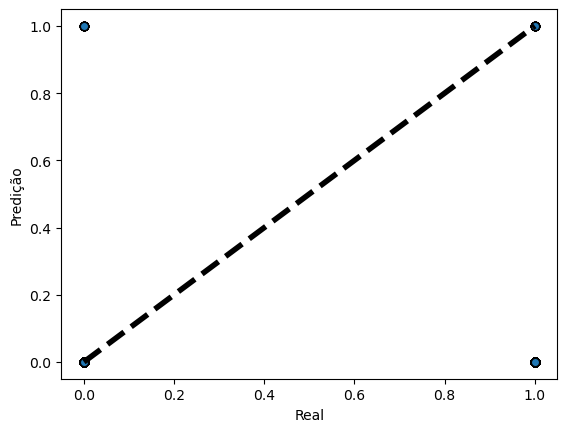

In [92]:
# Plota resultados
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

categorias = ['não popular', 'popular']
cv_results = cross_val_predict(clf_logistica, X_treino, y_treino, cv=3)
print(classification_report(y_treino, cv_results, target_names=categorias))

fig, ax = plt.subplots()
ax.scatter(y_teste, y_pred_logistica, edgecolors=(0, 0, 0))
ax.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()


One Hot Encoder

In [93]:
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.special import expit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)
y = carros['label'].to_numpy()

carros = pd.concat([pd.get_dummies(carros["tipo_transmissao"], prefix='tipo_transmissao', drop_first=True),
                    pd.get_dummies(carros["tracao"], prefix='tracao', drop_first=True),
                    pd.get_dummies(carros["combustivel"], prefix='combustivel', drop_first=True),
                    pd.get_dummies(carros["tamanho"], prefix='tamanho', drop_first=True),
                    pd.get_dummies(carros["estilo"], prefix='estilo', drop_first=True),
                   carros], axis=1)

carros = carros.drop(columns=['fabricante','modelo','popularidade', 'tipo_transmissao', 
                              'tracao','combustivel','tamanho','estilo','preco_venda'])

X = carros.iloc[:, :-1].to_numpy() 
y = carros.iloc[:, -1].to_numpy()


# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

# Classificacao Regressao Logistica
clf_logistica = linear_model.LogisticRegression(C=1e5, max_iter=10000, class_weight={0: 0.7, 1: 0.9})
clf_logistica.fit(X_treino, y_treino)
y_pred_logistica = clf_logistica.predict(X_teste)
carros

,tipo_transmissao_1,tipo_transmissao_2,tipo_transmissao_3,tipo_transmissao_4,tracao_1,tracao_2,tracao_3,combustivel_2,combustivel_3,combustivel_4,...,estilo_14,estilo_15,ano,hp,cilindros,num_portas,categoria,km_por_l_estrada,km_por_l_cidade,label
1,False,False,True,False,False,False,True,False,False,False,...,False,False,2011,300.0,6.0,2.0,68,28,19,1
2,False,False,True,False,False,False,True,False,False,False,...,False,False,2011,300.0,6.0,2.0,65,28,20,1
3,False,False,True,False,False,False,True,False,False,False,...,False,False,2011,230.0,6.0,2.0,68,28,18,1
4,False,False,True,False,False,False,True,False,False,False,...,False,False,2011,230.0,6.0,2.0,64,28,18,1
5,False,False,True,False,False,False,True,False,False,False,...,False,False,2012,230.0,6.0,2.0,68,28,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,False,False,False,False,False,False,True,False,True,False,...,False,False,2017,355.0,8.0,4.0,49,23,16,0
11747,False,False,False,False,False,False,False,False,True,False,...,False,False,2017,355.0,8.0,4.0,49,22,16,0
11748,False,False,False,False,False,False,True,False,False,False,...,False,False,2017,420.0,8.0,4.0,70,22,15,0
11749,False,False,False,False,False,False,False,False,True,False,...,False,False,2017,355.0,8.0,4.0,49,22,16,0


In [94]:
resultados_one_hot_encode = classification_report(y_teste, y_pred_logistica)
print(resultados_one_hot_encode)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1130
           1       0.57      0.51      0.54       715

    accuracy                           0.66      1845
   macro avg       0.64      0.64      0.64      1845
weighted avg       0.66      0.66      0.66      1845



Regressão Linear

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
# Lê o dataset de carros
carros = pd.read_csv("carros_modelos_categorical.csv")

# Seleciona apenas as colunas necessárias
X = carros.loc[:, 'ano':'popularidade'].to_numpy() #.reshape(-1, 1)

y = carros['preco_venda'].to_numpy()

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30)


In [98]:
# Cria o modelo de regressão linear
modelo = LinearRegression()

# Treina o modelo
modelo.fit(X_treino, y_treino)

# Faz previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Calcula o coeficiente de determinação (R²)
r2 = r2_score(y_teste, y_pred)

# Mostra os resultados
print("Coeficiente de determinação (R²):", r2)

Coeficiente de determinação (R²): 0.5993894696312263
